In [ ]:
#google drive a erişelim
!nvidia-smi

Thu Jun  8 10:25:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!unzip /content/drive/MyDrive/depplearning_project_emotion.zip -d content

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: content/train/sad/Training_65242339.jpg  
  inflating: content/train/sad/Training_65267116.jpg  
  inflating: content/train/sad/Training_65275626.jpg  
  inflating: content/train/sad/Training_6529266.jpg  
  inflating: content/train/sad/Training_65329617.jpg  
  inflating: content/train/sad/Training_65338712.jpg  
  inflating: content/train/sad/Training_65338797.jpg  
  inflating: content/train/sad/Training_65387162.jpg  
  inflating: content/train/sad/Training_65404494.jpg  
  inflating: content/train/sad/Training_65426218.jpg  
  inflating: content/train/sad/Training_65430136.jpg  
  inflating: content/train/sad/Training_65437377.jpg  
  inflating: content/train/sad/Training_6545735.jpg  
  inflating: content/train/sad/Training_65463385.jpg  
  inflating: content/train/sad/Training_65473985.jpg  
  inflating: content/train/sad/Training_65502829.jpg  
  inflating: content/train/sad/Training_65505359.jpg  
  inflating: content

In [ ]:
# test data

In [ ]:
!unzip /content/drive/MyDrive/test_proje_derinogrenme.zip -d content

Archive:  /content/drive/MyDrive/test_proje_derinogrenme.zip
  inflating: content/test_proje/image0000018.jpg  
  inflating: content/test_proje/image0000022.jpg  
  inflating: content/test_proje/image0000030.jpg  
  inflating: content/test_proje/image0000035.jpg  
  inflating: content/test_proje/image0000045.jpg  
  inflating: content/test_proje/image0000138.jpg  
  inflating: content/test_proje/image0000145.jpg  
  inflating: content/test_proje/image0000197.jpg  
  inflating: content/test_proje/image0000372.jpg  
  inflating: content/test_proje/image0000450.jpg  
  inflating: content/test_proje/image0000467.jpg  
  inflating: content/test_proje/image0000643.jpg  
  inflating: content/test_proje/image0000808.jpg  
  inflating: content/test_proje/image0000843.jpg  
  inflating: content/test_proje/image0000915.jpg  
  inflating: content/test_proje/image0001274.jpg  
  inflating: content/test_proje/image0002324.jpg  


In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, Dense, Flatten, \
                                    Concatenate, GlobalMaxPooling2D, \
                                    MaxPooling2D, GlobalAveragePooling2D, \
                                    AveragePooling2D

import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout,BatchNormalization

In [ ]:
train_data="/content/content/train"
val_data= "/content/content/test"

In [ ]:
image_size = (48, 48)


train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = train_data,
    image_size = image_size,
    batch_size = 32,
    label_mode='int',
    shuffle = True,
)

valid_ds = tf.keras.utils.image_dataset_from_directory(
    directory = val_data,
    image_size = image_size,
    batch_size = 32,
    label_mode='int',
    shuffle = False
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [ ]:
classes = train_ds.class_names
classes

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

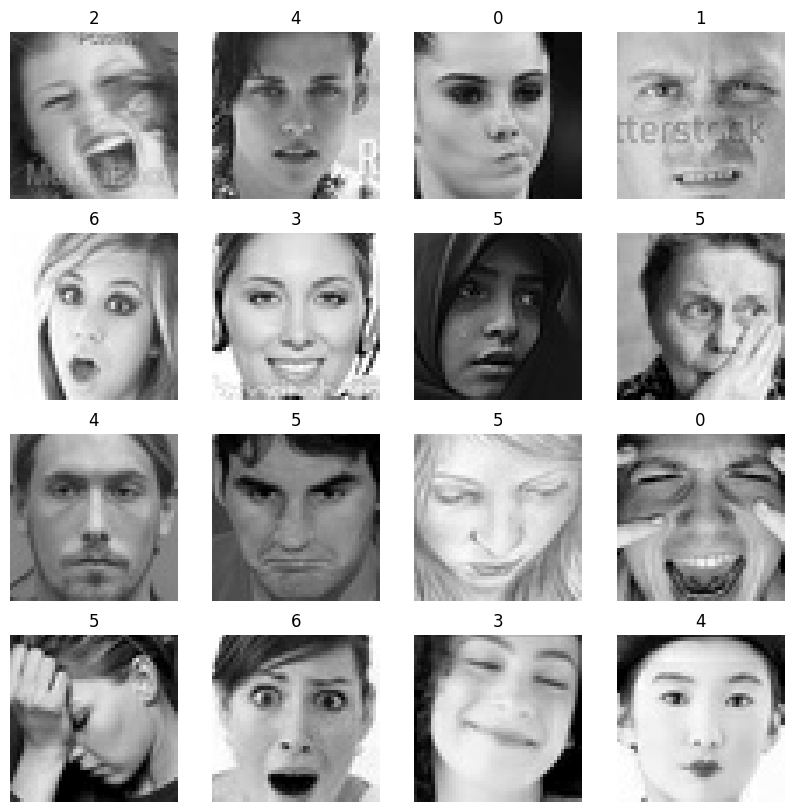

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

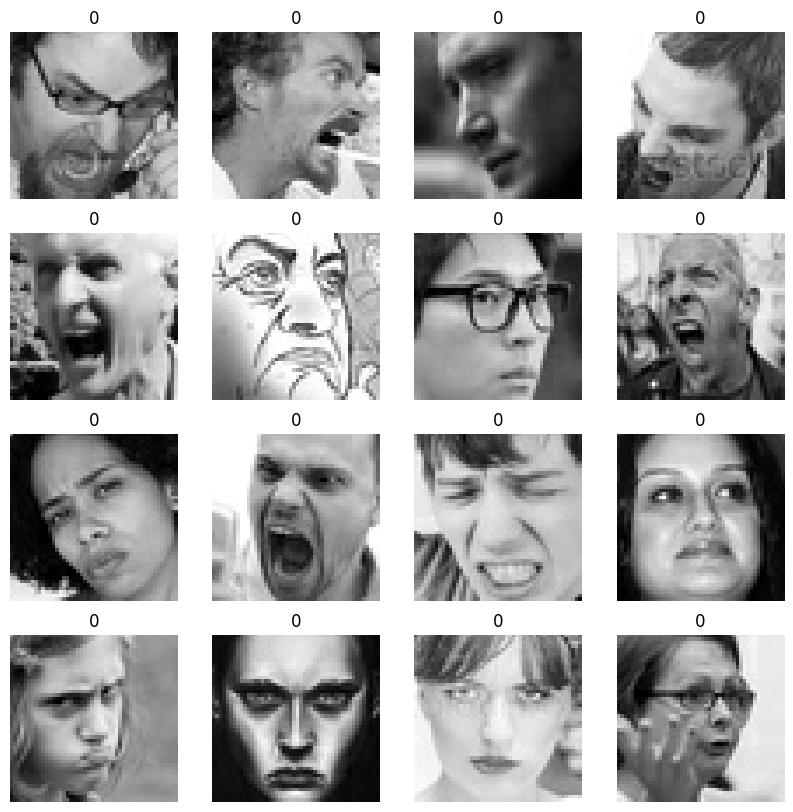

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in valid_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(data.emotion.unique()):
for j in range(5):
px = data[data.emotion==label].pixels.iloc[k]
px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
k += 1
ax = plt.subplot(7, 7, k)
ax.imshow(px)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(label_to_text[label])
plt.tight_layout()

In [ ]:
model=tf.keras.Sequential([
        tf.keras.layers.InputLayer((48,48,3)),
        tf.keras.layers.Rescaling(1/255.0),

        Conv2D(32,3,activation="relu"),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),
        Conv2D(64,3,activation="relu"),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),
        Conv2D(128,3,activation="relu"),

        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.2),
        Conv2D(256,3,activation="relu"),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.2),
        GlobalMaxPooling2D(),
        Dense(128,activation="relu"),
        BatchNormalization(),
        Dropout(0.25),
        Dense(7,activation="softmax")
    ])


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_23 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 batch_normalization_27 (Bat  (None, 46, 46, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 23, 23, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 21, 21, 64)       

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer="adam",metrics=["acc"])

In [ ]:
history=model.fit(train_ds,validation_data=valid_ds,epochs=50)

Epoch 1/50
898/898 [==============================] - 12s 9ms/step - loss: 1.8539 - acc: 0.2977 - val_loss: 1.5383 - val_acc: 0.4033
Epoch 2/50
898/898 [==============================] - 8s 9ms/step - loss: 1.4981 - acc: 0.4252 - val_loss: 1.5730 - val_acc: 0.4044
Epoch 3/50
898/898 [==============================] - 8s 9ms/step - loss: 1.3817 - acc: 0.4709 - val_loss: 1.4210 - val_acc: 0.4452
Epoch 4/50
898/898 [==============================] - 8s 9ms/step - loss: 1.3041 - acc: 0.5050 - val_loss: 1.2709 - val_acc: 0.5096
Epoch 5/50
898/898 [==============================] - 8s 9ms/step - loss: 1.2578 - acc: 0.5198 - val_loss: 1.2313 - val_acc: 0.5251
Epoch 6/50
898/898 [==============================] - 8s 9ms/step - loss: 1.2082 - acc: 0.5426 - val_loss: 1.2136 - val_acc: 0.5347
Epoch 7/50
898/898 [==============================] - 8s 9ms/step - loss: 1.1794 - acc: 0.5531 - val_loss: 1.2017 - val_acc: 0.5394
Epoch 8/50
898/898 [==============================] - 8s 9ms/step - loss: 1

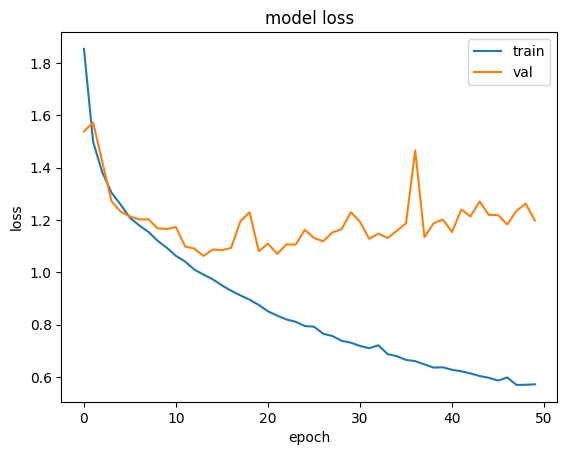

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

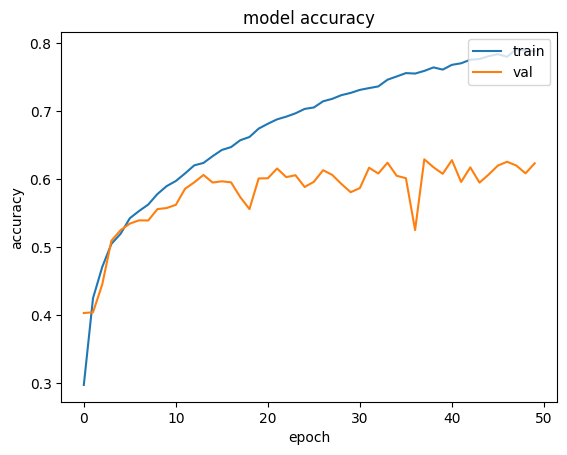

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
from keras.api._v2.keras import regularizers
model=tf.keras.Sequential([
        tf.keras.layers.InputLayer((48,48,3)),
        tf.keras.layers.Rescaling(1/255.0),

        Conv2D(32,3,activation="relu",padding="same"),
        Conv2D(64,3,activation="relu",padding="same"),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Conv2D(128,3,activation="relu",padding="same"),
        Conv2D(256,3,activation="relu",padding="same",kernel_regularizer=regularizers.l1(0.01)),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.2),

        GlobalMaxPooling2D(),

        Dense(1024,activation="relu"),
        Dropout(0.5),

        Dense(7,activation="softmax")
    ])


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_27 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 conv2d_28 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_32 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 24, 24, 64)       

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer="adam",metrics=["acc"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(
    monitor = "val_acc",
    patience = 9,
    mode = "max",
    verbose = 1,
    restore_best_weights = True
    )

In [ ]:
callbacks = [early_stopping]

In [ ]:
history=model.fit(train_ds,
           epochs = 60,
           validation_data = valid_ds,callbacks=callbacks)

Epoch 1/60
898/898 [==============================] - 16s 14ms/step - loss: 6.3729 - acc: 0.2257 - val_loss: 3.1126 - val_acc: 0.2385
Epoch 2/60
898/898 [==============================] - 12s 13ms/step - loss: 2.8028 - acc: 0.2497 - val_loss: 2.6856 - val_acc: 0.2556
Epoch 3/60
898/898 [==============================] - 12s 13ms/step - loss: 2.5661 - acc: 0.2944 - val_loss: 2.4171 - val_acc: 0.3307
Epoch 4/60
898/898 [==============================] - 12s 13ms/step - loss: 2.3652 - acc: 0.3526 - val_loss: 2.2840 - val_acc: 0.3281
Epoch 5/60
898/898 [==============================] - 12s 13ms/step - loss: 2.2171 - acc: 0.3708 - val_loss: 2.2162 - val_acc: 0.3288
Epoch 6/60
898/898 [==============================] - 12s 13ms/step - loss: 2.1683 - acc: 0.3813 - val_loss: 2.2017 - val_acc: 0.3236
Epoch 7/60
898/898 [==============================] - 12s 13ms/step - loss: 2.1173 - acc: 0.3944 - val_loss: 2.1269 - val_acc: 0.3495
Epoch 8/60
898/898 [==============================] - 12s 13ms

In [ ]:
model=tf.keras.Sequential([
        tf.keras.layers.InputLayer((48,48,3)),
        tf.keras.layers.Rescaling(1/255.0),

        Conv2D(32,3,activation="relu",padding="same"),
        BatchNormalization(),
        Conv2D(32,3,activation="relu",padding="same"),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.2),


        Conv2D(64,3,activation="relu",padding="same"),
        BatchNormalization(),
        Conv2D(64,3,activation="relu",padding="same"),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.2),


        Conv2D(128,3,activation="relu",padding="same"),
        BatchNormalization(),
        Conv2D(128,3,activation="relu",padding="same"),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.2),


        Conv2D(256,3,activation="relu",padding="same"),
        BatchNormalization(),
        Conv2D(256,3,activation="relu",padding="same"),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.2),

        GlobalMaxPooling2D(),

        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.5),


        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.5),


        Dense(7,activation="softmax")
    ])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer="adam",metrics=["acc"])

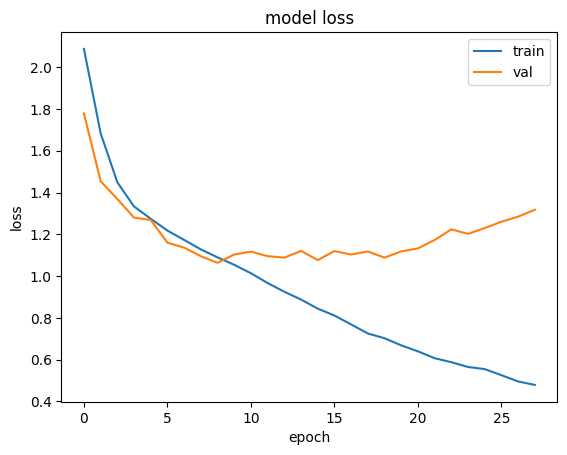

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

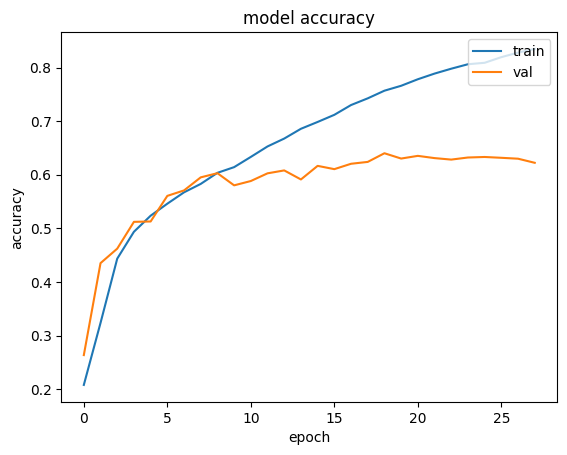

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
model=tf.keras.Sequential([
        tf.keras.layers.InputLayer((48,48,3)),
        tf.keras.layers.Rescaling(1/255.0),

        Conv2D(32,3,activation="relu",padding="same"),
        BatchNormalization(),
        Conv2D(64,3,activation="relu",padding="same"),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),


        Conv2D(128,3,activation="relu",padding="same"),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),


        Conv2D(512,3,activation="relu",padding="same"),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),


        Conv2D(512,3,activation="relu",padding="same"),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        GlobalMaxPooling2D(),

        Dense(256,activation="relu"),
        BatchNormalization(),
        Dropout(0.25),


        Dense(512,activation="relu"),
        BatchNormalization(),
        Dropout(0.25),


        Dense(7,activation="softmax")
    ])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_16 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_20 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_21 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)      

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer="adam",metrics=["acc"])

In [ ]:
history=model.fit(train_ds,
           epochs = 60,
           validation_data = valid_ds,callbacks=callbacks)

Epoch 1/60
898/898 [==============================] - 28s 25ms/step - loss: 1.9072 - acc: 0.2858 - val_loss: 2.0605 - val_acc: 0.2842
Epoch 2/60
898/898 [==============================] - 21s 24ms/step - loss: 1.4502 - acc: 0.4460 - val_loss: 1.4167 - val_acc: 0.4797
Epoch 3/60
898/898 [==============================] - 21s 24ms/step - loss: 1.2850 - acc: 0.5157 - val_loss: 1.1867 - val_acc: 0.5444
Epoch 4/60
898/898 [==============================] - 21s 24ms/step - loss: 1.2027 - acc: 0.5466 - val_loss: 1.1259 - val_acc: 0.5740
Epoch 5/60
898/898 [==============================] - 21s 24ms/step - loss: 1.1363 - acc: 0.5697 - val_loss: 1.1608 - val_acc: 0.5606
Epoch 6/60
898/898 [==============================] - 21s 24ms/step - loss: 1.0779 - acc: 0.5930 - val_loss: 1.0891 - val_acc: 0.5869
Epoch 7/60
898/898 [==============================] - 21s 24ms/step - loss: 1.0226 - acc: 0.6183 - val_loss: 1.0824 - val_acc: 0.6013
Epoch 8/60
898/898 [==============================] - 21s 24ms

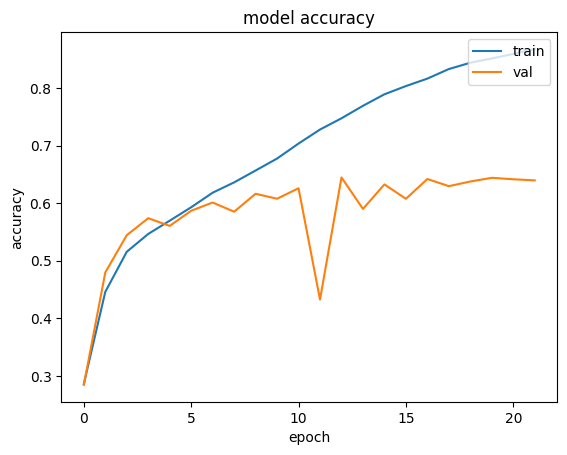

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

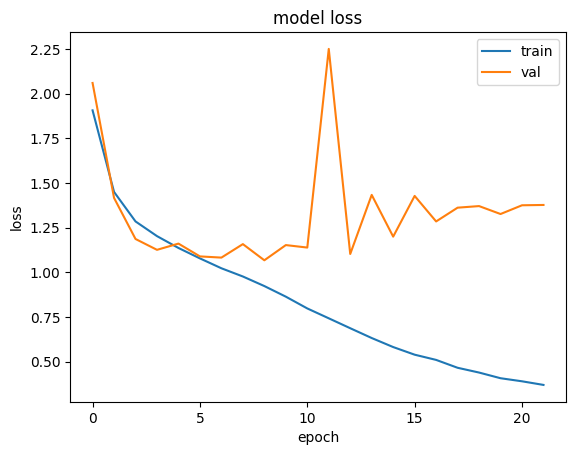

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
model.save("model1.h5")

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((48,48,3)),
    tf.keras.layers.Rescaling(1/255.0),


    Conv2D(32,3,activation="relu"),
    BatchNormalization(axis=3),
    Dropout(0.25),
    Conv2D(64,3, padding = 'same',activation="relu"),
    BatchNormalization(axis=3),
    MaxPooling2D((2,2)),
    Conv2D(64,3,activation="relu"),
    BatchNormalization(axis=3),
    Dropout(0.25),
    Conv2D(128,3,activation="relu", padding = 'same'),
    BatchNormalization(axis=3),
    MaxPooling2D((2,2)),
    Conv2D(128,3,activation="relu"),
    BatchNormalization(axis=3),
    MaxPooling2D((2,2)),
    GlobalMaxPooling2D(),

    Dense(250, activation='relu'),
    Dropout(0.5),
    Dense(7, activation = 'softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 46, 46, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                        

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer="adam",metrics=["acc"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(
    monitor = "val_acc",
    patience = 9,
    mode = "max",
    verbose = 1,
    restore_best_weights = True
    )


In [ ]:
callbacks = [early_stopping]

In [ ]:
history=model.fit(train_ds,
           epochs = 60,
           validation_data = valid_ds,callbacks=callbacks)

Epoch 1/60
898/898 [==============================] - 22s 17ms/step - loss: 1.8052 - acc: 0.2717 - val_loss: 1.7492 - val_acc: 0.3084
Epoch 2/60
898/898 [==============================] - 15s 17ms/step - loss: 1.5243 - acc: 0.3995 - val_loss: 1.4228 - val_acc: 0.4397
Epoch 3/60
898/898 [==============================] - 15s 16ms/step - loss: 1.4020 - acc: 0.4576 - val_loss: 1.3362 - val_acc: 0.4765
Epoch 4/60
898/898 [==============================] - 15s 16ms/step - loss: 1.3265 - acc: 0.4932 - val_loss: 1.2544 - val_acc: 0.5219
Epoch 5/60
898/898 [==============================] - 15s 16ms/step - loss: 1.2805 - acc: 0.5090 - val_loss: 1.2197 - val_acc: 0.5348
Epoch 6/60
898/898 [==============================] - 15s 16ms/step - loss: 1.2383 - acc: 0.5305 - val_loss: 1.1705 - val_acc: 0.5548
Epoch 7/60
898/898 [==============================] - 15s 16ms/step - loss: 1.2051 - acc: 0.5450 - val_loss: 1.2227 - val_acc: 0.5371
Epoch 8/60
898/898 [==============================] - 15s 16ms

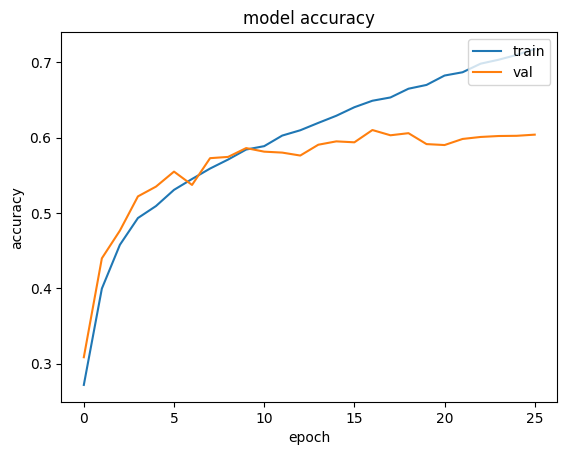

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

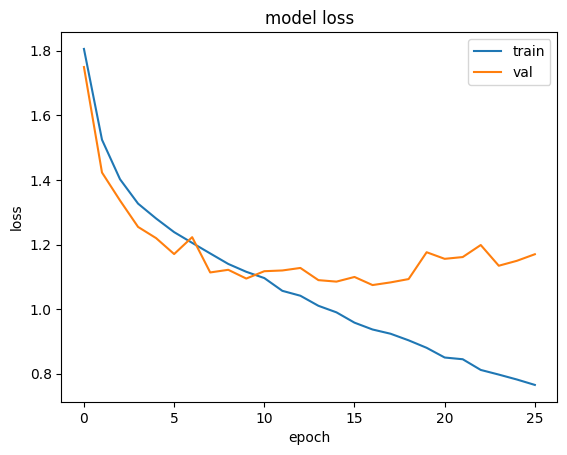

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
model.save('/content/drive/MyDrive/modeller/modelcnn.h5')


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model1=load_model("/content/drive/MyDrive/modeller/modelcnn.h5")

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
train_ds.class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
label_dict = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

In [ ]:
import numpy as np

# Train verileri için tahminler ve etiketler
train_predictions = model1.predict(train_ds)
train_labels = np.concatenate([y for x, y in train_ds], axis=0)

# Val verileri için tahminler ve etiketler
val_predictions = model1.predict(valid_ds)
val_labels = np.concatenate([y for x, y in valid_ds], axis=0)

train_cm = confusion_matrix(train_labels, train_predictions.argmax(axis=1))

# Val confusion matrix
val_cm = confusion_matrix(val_labels, val_predictions.argmax(axis=1))

import seaborn as sns
import matplotlib.pyplot as plt



225/225 [==============================] - 1s 4ms/step


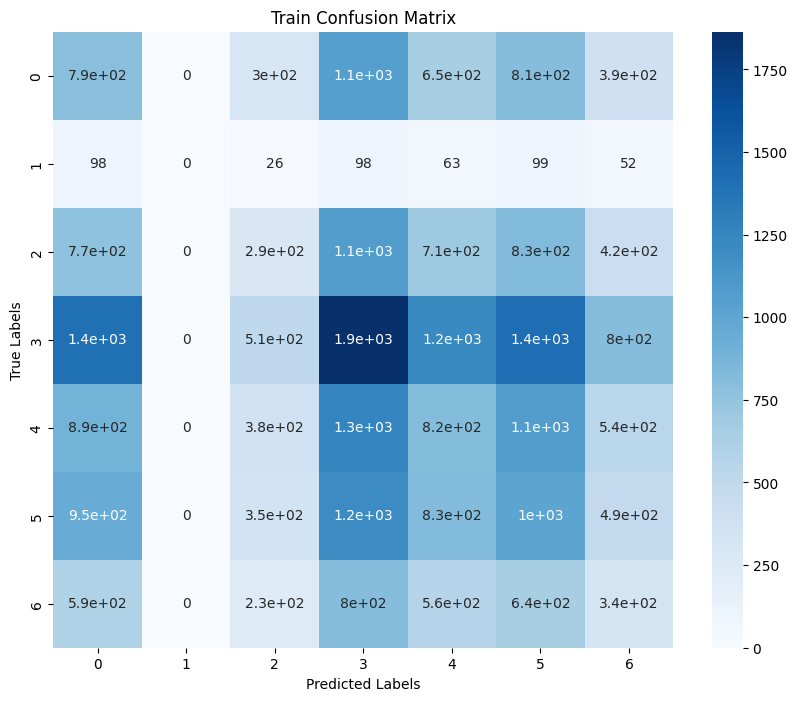

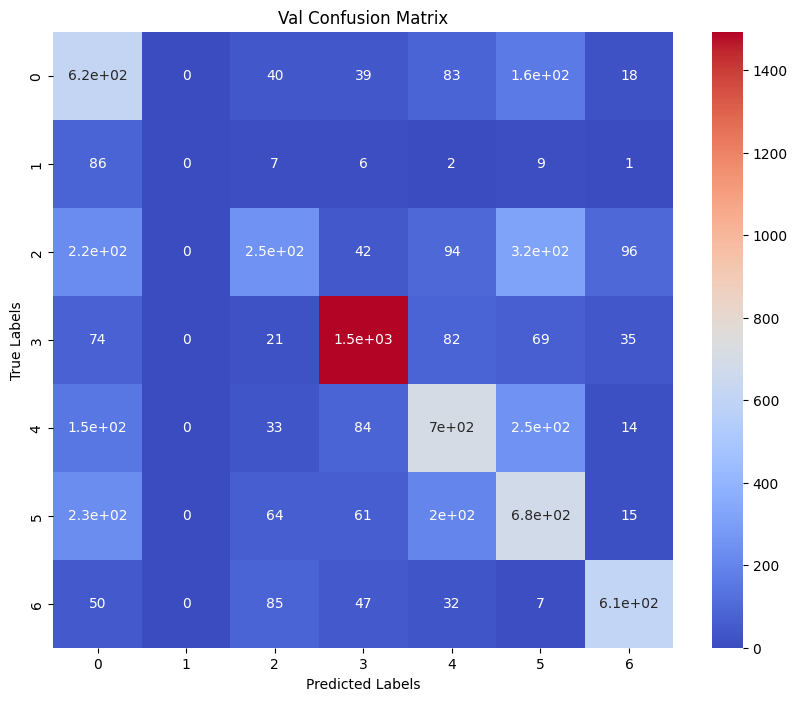

In [ ]:
# Val confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(val_cm, annot=True, cmap="coolwarm")
plt.title("Val Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Transfer Learning

### 1. VGG16

In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import preprocess_input  # ölçeklendirme için
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
input_layer = tf.keras.Input((48, 48, 3))
preprocess_inputs = tf.keras.layers.Lambda(lambda x: preprocess_input(x))(input_layer)


In [ ]:
vgg16_model=VGG16(
    weights="imagenet",
    include_top=False,  # true olursa fc lerde gelecek
    input_tensor=preprocess_inputs

)
vgg16_model

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
from keras.layers.core.activation import activations
x=GlobalAveragePooling2D()(vgg16_model.output)
x=Dense(7,activation="softmax")(x)

vgg16=tf.keras.Model(inputs=input_layer,outputs=x)
vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 48, 48, 3)         0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584

In [ ]:
# compile
opt=tf.keras.optimizers.SGD(learning_rate=0.001)
vgg16.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=opt,metrics=["acc"])

In [ ]:
history=vgg16.fit(train_ds,
           epochs = 60,
           validation_data = valid_ds,callbacks=callbacks)

Epoch 1/60
898/898 [==============================] - 43s 44ms/step - loss: 1.8323 - acc: 0.3005 - val_loss: 1.8172 - val_acc: 0.2106
Epoch 2/60
898/898 [==============================] - 38s 42ms/step - loss: 1.4634 - acc: 0.4378 - val_loss: 1.4952 - val_acc: 0.4335
Epoch 3/60
898/898 [==============================] - 38s 42ms/step - loss: 1.2957 - acc: 0.5076 - val_loss: 1.5651 - val_acc: 0.3859
Epoch 4/60
898/898 [==============================] - 38s 42ms/step - loss: 1.1946 - acc: 0.5473 - val_loss: 1.2156 - val_acc: 0.5357
Epoch 5/60
898/898 [==============================] - 38s 42ms/step - loss: 1.1141 - acc: 0.5775 - val_loss: 1.2909 - val_acc: 0.5202
Epoch 6/60
898/898 [==============================] - 38s 42ms/step - loss: 1.0438 - acc: 0.6048 - val_loss: 1.4798 - val_acc: 0.4808
Epoch 7/60
898/898 [==============================] - 38s 42ms/step - loss: 0.9783 - acc: 0.6331 - val_loss: 1.1947 - val_acc: 0.5651
Epoch 8/60
898/898 [==============================] - 38s 42ms

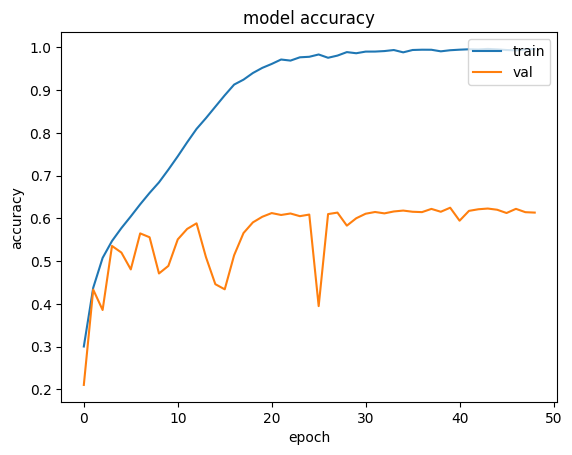

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

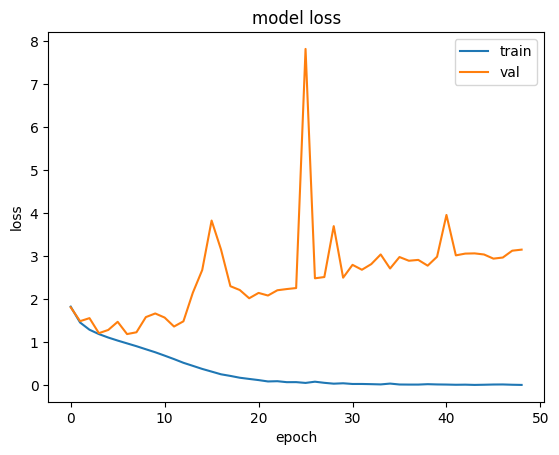

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

### 2.vgg19

In [ ]:
from tensorflow.keras.applications import vgg19
from tensorflow.keras.applications.vgg19 import preprocess_input  # ölçeklendirme için
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
input_layer = tf.keras.Input((48, 48, 3))
preprocess_inputs = tf.keras.layers.Lambda(lambda x: preprocess_input(x))(input_layer)


In [ ]:
vgg19_model=VGG19(
    weights="imagenet",
    include_top=False,  # true olursa fc lerde gelecek
    input_tensor=preprocess_inputs

)


80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
from keras.layers.core.activation import activations
x=GlobalAveragePooling2D()(vgg19_model.output)
x=Dense(7,activation="softmax")(x)

vgg19=tf.keras.Model(inputs=input_layer,outputs=x)
vgg19.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 lambda_1 (Lambda)           (None, 48, 48, 3)         0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       1475

In [ ]:
# compile
opt=tf.keras.optimizers.SGD(learning_rate=0.001)
vgg19.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=opt,metrics=["acc"])

In [ ]:
history=vgg19.fit(train_ds,
           epochs = 60,
           validation_data = valid_ds,callbacks=callbacks)

Epoch 1/60
898/898 [==============================] - 50s 53ms/step - loss: 1.7829 - acc: 0.2969 - val_loss: 1.6677 - val_acc: 0.3551
Epoch 2/60
898/898 [==============================] - 47s 52ms/step - loss: 1.4105 - acc: 0.4575 - val_loss: 1.5785 - val_acc: 0.3966
Epoch 3/60
898/898 [==============================] - 47s 53ms/step - loss: 1.2739 - acc: 0.5157 - val_loss: 1.2797 - val_acc: 0.5157
Epoch 4/60
898/898 [==============================] - 47s 53ms/step - loss: 1.1805 - acc: 0.5496 - val_loss: 1.3178 - val_acc: 0.5033
Epoch 5/60
898/898 [==============================] - 47s 53ms/step - loss: 1.1095 - acc: 0.5809 - val_loss: 1.2435 - val_acc: 0.5394
Epoch 6/60
898/898 [==============================] - 48s 53ms/step - loss: 1.0461 - acc: 0.6067 - val_loss: 1.1955 - val_acc: 0.5561
Epoch 7/60
898/898 [==============================] - 47s 52ms/step - loss: 0.9815 - acc: 0.6338 - val_loss: 1.2248 - val_acc: 0.5585
Epoch 8/60
898/898 [==============================] - 47s 53ms

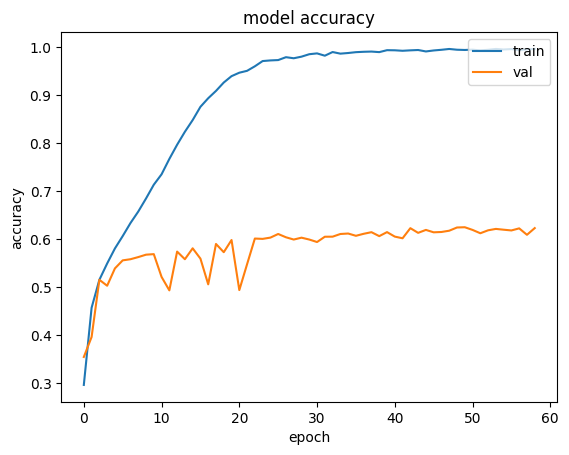

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

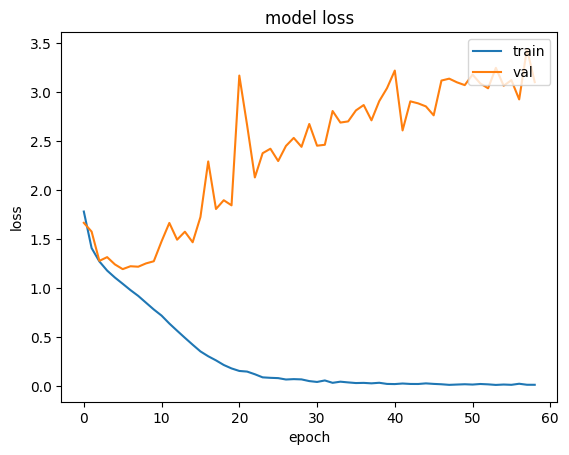

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

### 3. xception

In [ ]:
from tensorflow.keras.applications import xception
from tensorflow.keras.applications.xception import preprocess_input  # ölçeklendirme için
from tensorflow.keras.applications.xception import Xception

In [ ]:
input_layer = tf.keras.Input((48, 48, 3))
preprocess_inputs = tf.keras.layers.Lambda(lambda x: preprocess_input(x))(input_layer)


In [ ]:
xcp_model=Xception(
    weights="imagenet",
    include_top=False,  # true olursa fc lerde gelecek
    input_tensor=preprocess_inputs

)
xcp_model

83683744/83683744 [==============================] - 3s 0us/step


In [ ]:
x=GlobalAveragePooling2D()(xcp_model.output)
x=Dense(7,activation="softmax")(x)

xception=tf.keras.Model(inputs=input_layer,outputs=x)
xception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 lambda_1 (Lambda)              (None, 48, 48, 3)    0           ['input_2[0][0]']                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 23, 23, 32)   864         ['lambda_1[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 23, 23, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                       

In [ ]:
xception.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer="adam",metrics=["acc"])

In [ ]:
history=xception.fit(train_ds,
           epochs = 60,
           validation_data = valid_ds,callbacks=callbacks)

Epoch 1/60
898/898 [==============================] - 105s 74ms/step - loss: 1.5120 - acc: 0.4142 - val_loss: 1.2852 - val_acc: 0.5017
Epoch 2/60
898/898 [==============================] - 66s 73ms/step - loss: 1.1897 - acc: 0.5526 - val_loss: 1.1908 - val_acc: 0.5524
Epoch 3/60
898/898 [==============================] - 66s 74ms/step - loss: 1.0361 - acc: 0.6183 - val_loss: 1.1810 - val_acc: 0.5697
Epoch 4/60
898/898 [==============================] - 67s 74ms/step - loss: 0.9241 - acc: 0.6604 - val_loss: 1.2772 - val_acc: 0.5380
Epoch 5/60
898/898 [==============================] - 67s 74ms/step - loss: 0.7871 - acc: 0.7118 - val_loss: 1.1979 - val_acc: 0.5924
Epoch 6/60
898/898 [==============================] - 67s 74ms/step - loss: 0.6661 - acc: 0.7591 - val_loss: 1.4800 - val_acc: 0.5465
Epoch 7/60
898/898 [==============================] - 67s 75ms/step - loss: 0.5466 - acc: 0.8056 - val_loss: 1.5368 - val_acc: 0.5667
Epoch 8/60
898/898 [==============================] - 67s 74m

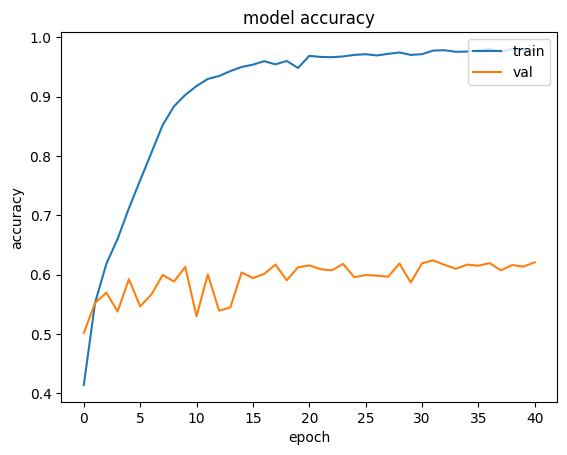

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

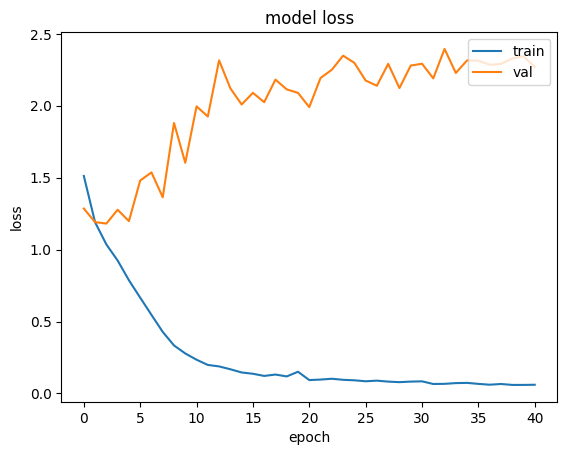

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

## 4.DENSE-NET


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input


In [ ]:
input_layer = tf.keras.Input((48, 48, 3))
preprocessed_inputs = tf.keras.layers.Lambda(lambda x: preprocess_input(x))(input_layer)


In [ ]:
dense_model=DenseNet121(
    weights="imagenet",
    include_top=False,  # true olursa fc lerde gelecek
    input_tensor=preprocessed_inputs

)
dense_model

In [ ]:
x = GlobalAveragePooling2D()(dense_model.output)
x = Dense(7,activation="softmax")(x)

densenet = tf.keras.Model(inputs=input_layer, outputs=x)
densenet.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 lambda_7 (Lambda)              (None, 48, 48, 3)    0           ['input_8[0][0]']                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 54, 54, 3)   0           ['lambda_7[0][0]']               
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 24, 24, 64)   9408        ['zero_padding2d_4[0][0]'] 

In [ ]:
densenet.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer="adam",metrics=["acc"])

In [ ]:
history=densenet.fit(train_ds,
           epochs = 60,
           validation_data = valid_ds,callbacks=callbacks)

Epoch 1/60
898/898 [==============================] - 132s 78ms/step - loss: 1.6043 - acc: 0.3896 - val_loss: 2.3980 - val_acc: 0.3948
Epoch 2/60
898/898 [==============================] - 67s 75ms/step - loss: 1.2984 - acc: 0.5126 - val_loss: 6.2111 - val_acc: 0.3589
Epoch 3/60
898/898 [==============================] - 67s 75ms/step - loss: 1.3187 - acc: 0.5111 - val_loss: 4.8855 - val_acc: 0.4302
Epoch 4/60
898/898 [==============================] - 67s 75ms/step - loss: 1.3465 - acc: 0.5020 - val_loss: 1.8334 - val_acc: 0.3559
Epoch 5/60
898/898 [==============================] - 67s 75ms/step - loss: 1.1813 - acc: 0.5573 - val_loss: 3.4685 - val_acc: 0.1690
Epoch 6/60
898/898 [==============================] - 67s 75ms/step - loss: 1.4694 - acc: 0.4528 - val_loss: 1.8008 - val_acc: 0.4050
Epoch 7/60
898/898 [==============================] - 68s 76ms/step - loss: 1.3383 - acc: 0.5014 - val_loss: 1.2056 - val_acc: 0.5382
Epoch 8/60
898/898 [==============================] - 68s 76m

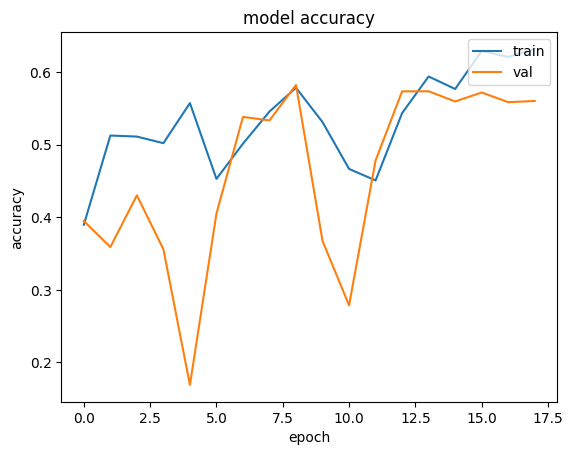

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

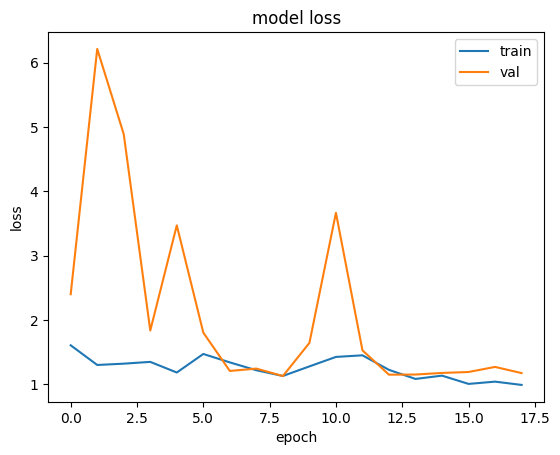

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

## 5.MOBİLENET

In [ ]:
from tensorflow.keras.applications import mobilenet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.mobilenet import MobileNet

In [ ]:
input_layer = tf.keras.Input((48, 48, 3))
preprocessed_inputs = tf.keras.layers.Lambda(lambda x: preprocess_input(x))(input_layer)


In [ ]:

mobilnet_model=MobileNet(
    weights="imagenet",
    include_top=False,  # true olursa fc lerde gelecek
    input_tensor=preprocessed_inputs

)
mobilnet_model

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
x = GlobalAveragePooling2D()(mobilnet_model.output)
x = Dense(7,activation="softmax")(x)

mobilnet = tf.keras.Model(inputs=input_layer, outputs=x)
mobilnet.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 48, 48, 3)         0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 24, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 24, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 24, 32)       288       
                                                             

In [ ]:
mobilnet.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer="adam",metrics=["acc"])

In [ ]:
history=mobilnet.fit(train_ds,
           epochs = 60,
           validation_data = valid_ds,callbacks=callbacks)

Epoch 1/60
898/898 [==============================] - 33s 20ms/step - loss: 1.7031 - acc: 0.4016 - val_loss: 1.4940 - val_acc: 0.4603
Epoch 2/60
898/898 [==============================] - 17s 19ms/step - loss: 1.3646 - acc: 0.4945 - val_loss: 1.2722 - val_acc: 0.5166
Epoch 3/60
898/898 [==============================] - 17s 19ms/step - loss: 1.3290 - acc: 0.5084 - val_loss: 1.3695 - val_acc: 0.4819
Epoch 4/60
898/898 [==============================] - 17s 19ms/step - loss: 1.2794 - acc: 0.5289 - val_loss: 1.3375 - val_acc: 0.4905
Epoch 5/60
898/898 [==============================] - 17s 19ms/step - loss: 1.2324 - acc: 0.5427 - val_loss: 1.1639 - val_acc: 0.5624
Epoch 6/60
898/898 [==============================] - 17s 19ms/step - loss: 1.1555 - acc: 0.5686 - val_loss: 1.2265 - val_acc: 0.5535
Epoch 7/60
898/898 [==============================] - 17s 19ms/step - loss: 1.0894 - acc: 0.5917 - val_loss: 1.1496 - val_acc: 0.5730
Epoch 8/60
898/898 [==============================] - 17s 19ms

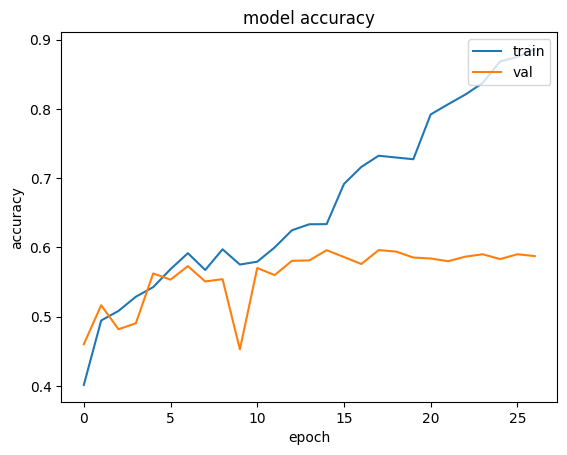

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

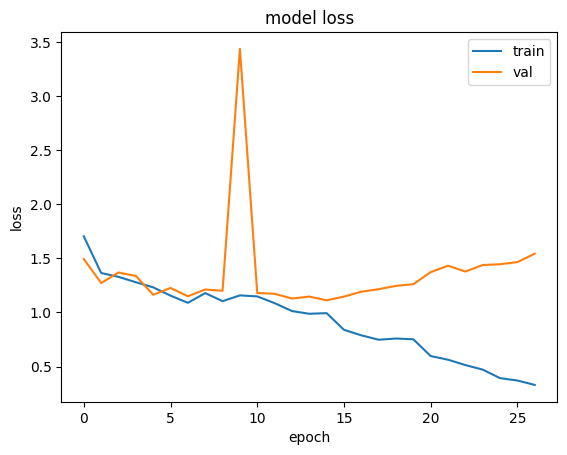

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
mobilnet.save('/content/drive/MyDrive/modeller/mobilnetmodel.h5')


In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model2=load_model('/content/drive/MyDrive/modeller/mobilnetmodel.h5')

In [ ]:
import numpy as np

# Train verileri için tahminler ve etiketler
train_predictions = mobilnet.predict(train_ds)
train_labels = np.concatenate([y for x, y in train_ds], axis=0)

# Val verileri için mobilnet ve etiketler
val_predictions = model1.predict(valid_ds)
val_labels = np.concatenate([y for x, y in valid_ds], axis=0)

train_cm = confusion_matrix(train_labels, train_predictions.argmax(axis=1))

# Val confusion matrix
val_cm = confusion_matrix(val_labels, val_predictions.argmax(axis=1))

import seaborn as sns
import matplotlib.pyplot as plt



225/225 [==============================] - 1s 3ms/step


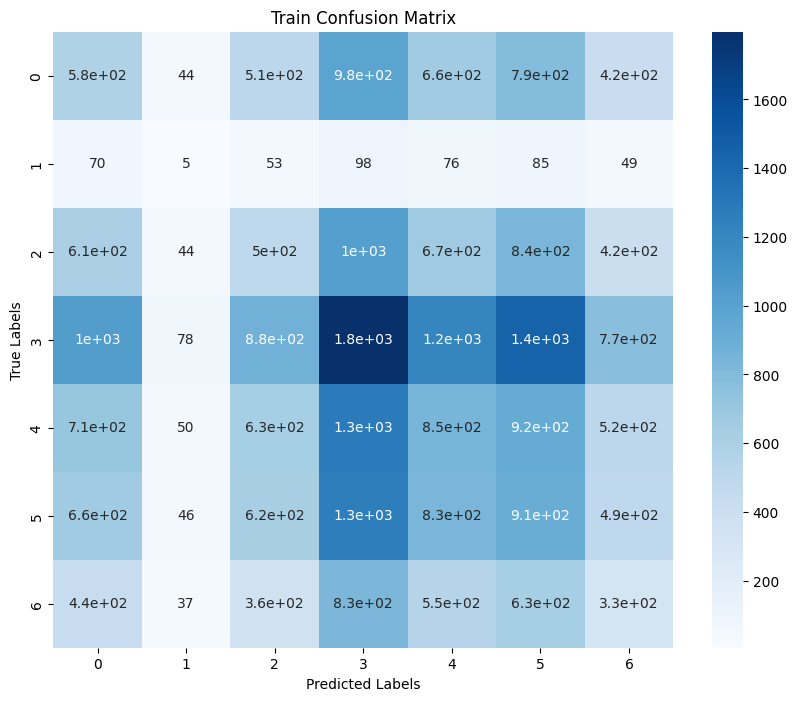

In [ ]:
# Train confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_cm, annot=True, cmap="Blues")
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




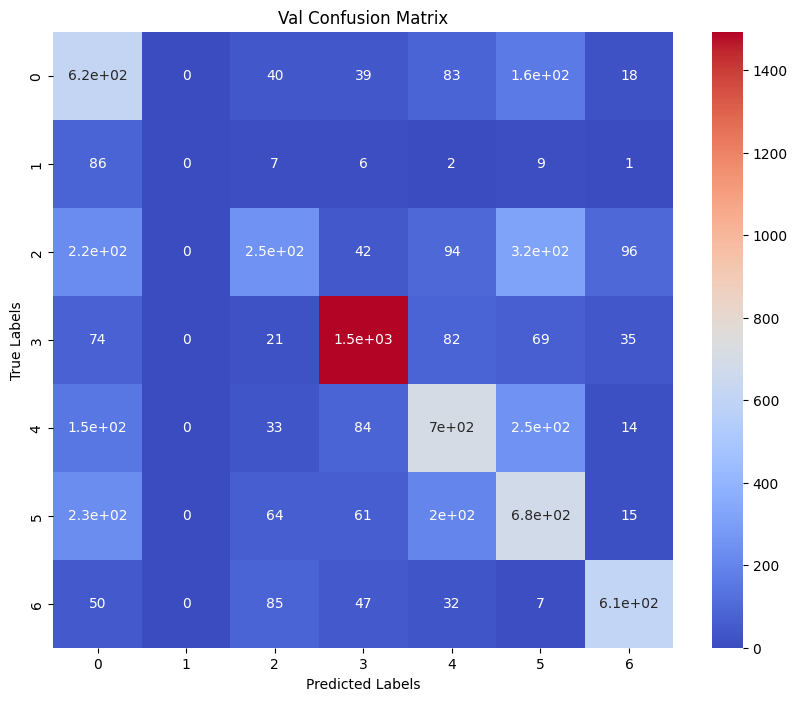

In [ ]:
# Val confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(val_cm, annot=True, cmap="coolwarm")
plt.title("Val Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## 6.EfficientNetB0

In [ ]:
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications.efficientnet import EfficientNetB0

In [ ]:
input_layer = tf.keras.Input((48, 48, 3))
preprocessed_inputs = tf.keras.layers.Lambda(lambda x: preprocess_input(x))(input_layer)


In [ ]:
effectnet_b0=EfficientNetB0(
    weights="imagenet",
    include_top=False,  # true olursa fc lerde gelecek
    input_tensor=preprocessed_inputs

)
effectnet_b0

NameError: ignored

In [ ]:
x = GlobalAveragePooling2D()(effectnet_b0.output)
x = Dense(7,activation="softmax")(x)

effecnetb0 = tf.keras.Model(inputs=input_layer, outputs=x)
effecnetb0.summary()


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 lambda_9 (Lambda)              (None, 48, 48, 3)    0           ['input_10[0][0]']               
                                                                                                  
 rescaling_2 (Rescaling)        (None, 48, 48, 3)    0           ['lambda_9[0][0]']               
                                                                                                  
 normalization_1 (Normalization  (None, 48, 48, 3)   7           ['rescaling_2[0][0]']            
 )                                                                                          

In [ ]:
effecnetb0.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer="adam",metrics=["acc"])

In [ ]:
history=effecnetb0.fit(train_ds,
           epochs = 60,
           validation_data = valid_ds,callbacks=callbacks)

Epoch 1/60
898/898 [==============================] - 81s 48ms/step - loss: 1.3913 - acc: 0.4719 - val_loss: 1.2177 - val_acc: 0.5472
Epoch 2/60
898/898 [==============================] - 41s 46ms/step - loss: 1.1132 - acc: 0.5772 - val_loss: 1.1739 - val_acc: 0.5578
Epoch 3/60
898/898 [==============================] - 41s 46ms/step - loss: 0.9975 - acc: 0.6243 - val_loss: 1.1696 - val_acc: 0.5798
Epoch 4/60
898/898 [==============================] - 41s 45ms/step - loss: 0.8973 - acc: 0.6640 - val_loss: 1.1773 - val_acc: 0.5950
Epoch 5/60
898/898 [==============================] - 41s 46ms/step - loss: 0.7935 - acc: 0.7056 - val_loss: 1.2685 - val_acc: 0.5816
Epoch 6/60
898/898 [==============================] - 41s 46ms/step - loss: 0.6942 - acc: 0.7426 - val_loss: 1.2698 - val_acc: 0.5992
Epoch 7/60
898/898 [==============================] - 41s 46ms/step - loss: 0.6169 - acc: 0.7713 - val_loss: 1.3858 - val_acc: 0.6081
Epoch 8/60
898/898 [==============================] - 41s 46ms

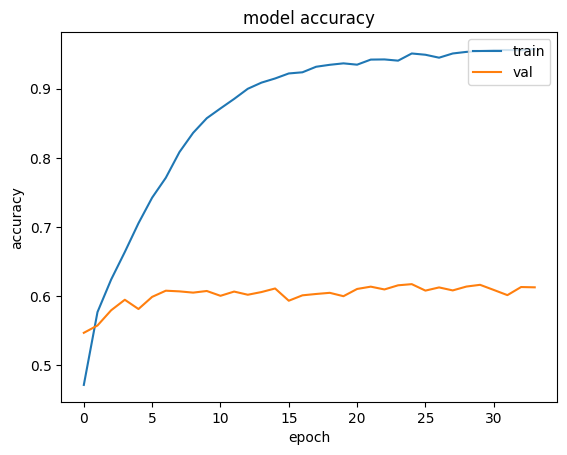

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

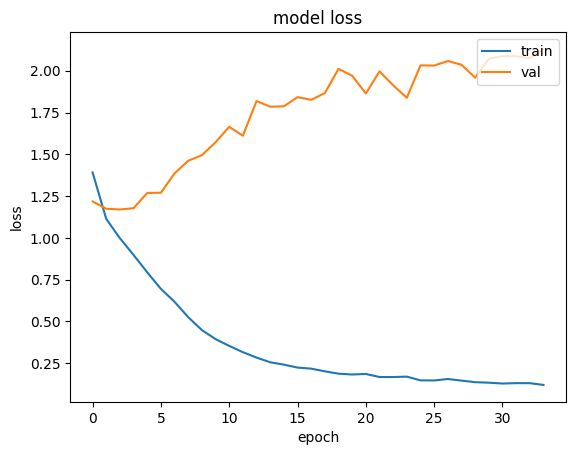

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
validd_names=valid_ds.class_names

In [ ]:
validation_pred_probs=mobilnet.predict(valid_ds)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)


225/225 [==============================] - 1s 4ms/step


In [ ]:
confusion_mtx = confusion_matrix(validd_names, validation_pred_labels)
class_names = list(train_ds.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ValueError: ignored

In [ ]:
validation_pred_labels

array([5, 5, 4, ..., 5, 2, 5])

In [ ]:
train_ds.class_indices

AttributeError: ignored

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array

(48, 48)


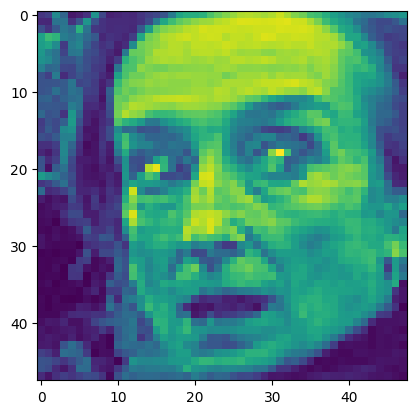

In [ ]:
img = load_img("content/train/surprise/Training_98481914.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

(48, 48)


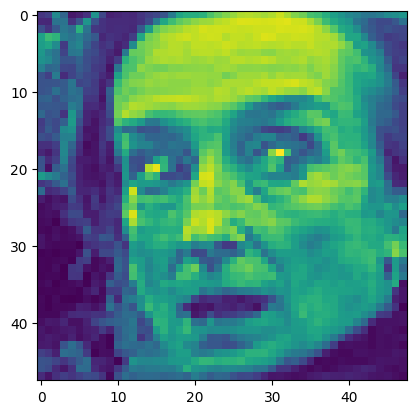

In [ ]:
img = load_img("content/train/surprise/Training_98481914.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

1/1 [==============================] - 8s 8s/step


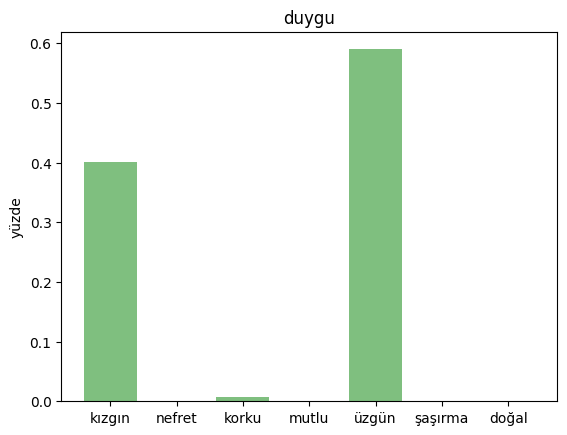

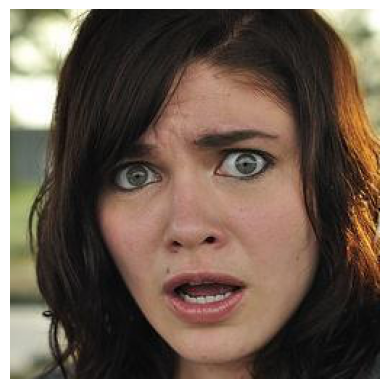

In [ ]:
test_img_path = "content/test_proje/image0000843.jpg"

img_orj = load_img(test_img_path)
img = load_img(test_img_path, grayscale=False, target_size=(48, 48))

x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model1.predict(x)
#Duygu Analizi(custom[0])


#1
objects = ('kızgın', 'nefret', 'korku', 'mutlu', 'üzgün', 'şaşırma', 'doğal')
y_pos = np.arange(len(objects))

plt.bar(y_pos, custom[0], align='center', alpha=0.5, color='g')
plt.xticks(y_pos, objects)
plt.ylabel('yüzde')
plt.title('duygu')
plt.show()

#2
x = np.array(x, 'float32')
x = x.reshape([48, 48,3]);
plt.axis('off')
plt.gray()
plt.imshow(img_orj)

plt.show()

1/1 [==============================] - 7s 7s/step


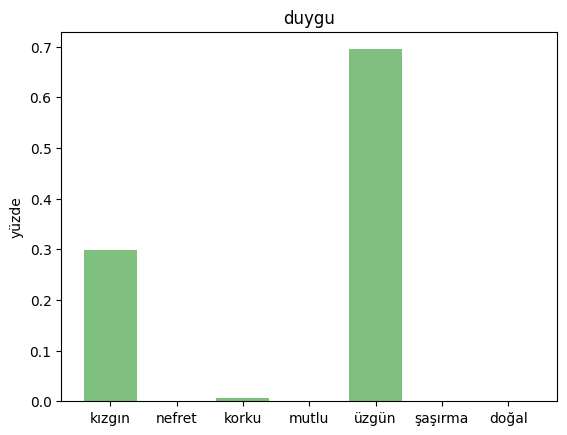

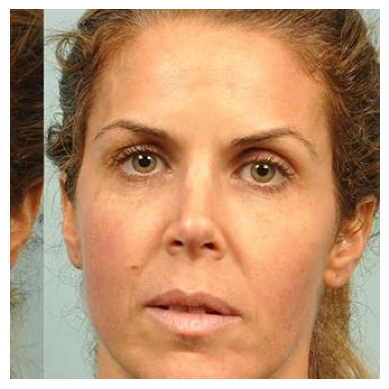

In [ ]:
test_img_path = "/content/content/test_proje/image0000018.jpg"

img_orj = load_img(test_img_path)
img = load_img(test_img_path, grayscale=False, target_size=(48, 48))

x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model1.predict(x)
#Duygu Analizi(custom[0])


#1
objects = ('kızgın', 'nefret', 'korku', 'mutlu', 'üzgün', 'şaşırma', 'doğal')
y_pos = np.arange(len(objects))

plt.bar(y_pos, custom[0], align='center', alpha=0.5, color='g')
plt.xticks(y_pos, objects)
plt.ylabel('yüzde')
plt.title('duygu')
plt.show()

#2
x = np.array(x, 'float32')
x = x.reshape([48, 48,3]);
plt.axis('off')
plt.gray()
plt.imshow(img_orj)

plt.show()

1/1 [==============================] - 0s 23ms/step


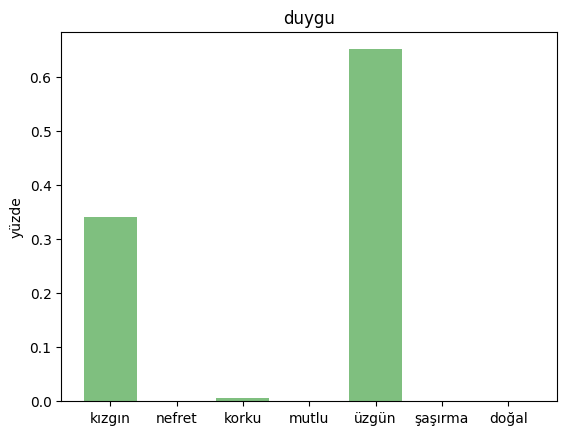

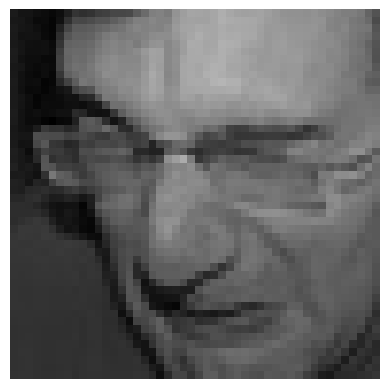

In [ ]:
test_img_path = "/content/content/train/disgust/Training_11660541.jpg"

img_orj = load_img(test_img_path)
img = load_img(test_img_path, grayscale=False, target_size=(48, 48))

x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model1.predict(x)
#Duygu Analizi(custom[0])


#1
objects = ('kızgın', 'nefret', 'korku', 'mutlu', 'üzgün', 'şaşırma', 'doğal')
y_pos = np.arange(len(objects))

plt.bar(y_pos, custom[0], align='center', alpha=0.5, color='g')
plt.xticks(y_pos, objects)
plt.ylabel('yüzde')
plt.title('duygu')
plt.show()

#2
x = np.array(x, 'float32')
x = x.reshape([48, 48,3]);
plt.axis('off')
plt.gray()
plt.imshow(img_orj)

plt.show()